In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics 
from scikitplot.estimators import plot_learning_curve

from sklearn.model_selection import GridSearchCV
from bayes_opt import BayesianOptimization
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, average_precision_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB, MultinomialNB, CategoricalNB, ComplementNB

import warnings

In [2]:
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('df_bkg_red.csv').drop(columns = 'Unnamed: 0')
models = ['A', 'B', 'C', 'D']
for i in models:
    df = pd.concat([df, pd.read_csv('df_model%s_red.csv'%(i)).drop(columns = 'Unnamed: 0')]) 

In [4]:
df

,mjjs,dyjjs,pt_asyms,lead_etas,sub_etas,lead_ungrs,sub_ungrs,lead_ntrk,sub_ntrk,weights,labels
0,1143.592529,0.039967,146.150787,0.525687,0.505117,38,48,-27.057099,-23.003627,1.003236e+00,0
1,1476.433716,1.387635,14.246826,-1.370057,0.113648,21,33,-47.325838,-42.513492,1.136396e+00,0
2,1540.057007,1.520813,94.611481,1.142746,-0.478356,46,31,-22.852907,-45.262825,2.008979e+00,0
3,1533.117432,1.955224,79.998779,-0.021801,1.994529,46,37,-22.796860,-39.182772,6.744341e+00,0
4,1164.201416,0.747826,97.815399,-0.216873,0.608687,40,45,-25.285624,-26.312875,7.691056e+00,0
...,...,...,...,...,...,...,...,...,...,...,...
258443,2686.224854,1.818661,211.678955,0.903337,-0.919513,58,129,-16.311280,44.333506,1.238581e-11,4
258444,2692.715088,0.938040,136.215576,0.324722,-0.615071,78,78,3.673315,-6.691277,2.048238e-09,4
258445,2476.301514,0.264742,106.248535,0.488685,0.740875,200,96,126.251694,12.251655,1.438433e-09,4
258446,2140.740234,1.310556,192.544434,-0.370099,0.945993,134,99,61.481212,17.241032,3.750820e-10,4


In [5]:
df = df.sample(frac=1., random_state=42)
df

,mjjs,dyjjs,pt_asyms,lead_etas,sub_etas,lead_ungrs,sub_ungrs,lead_ntrk,sub_ntrk,weights,labels
185709,2348.204346,2.582690,107.597839,-1.781167,0.812853,30,34,-43.333058,-49.069295,4.186123e-01,0
28574,1509.027222,1.219730,20.730957,-0.629339,0.596446,40,30,-28.599571,-45.901697,2.753940e-01,0
89624,1920.475098,0.934265,77.036987,-0.685208,0.254429,48,75,-23.425284,-5.055878,1.275407e-08,2
18265,1286.780151,1.617033,95.428650,0.433493,-1.216733,49,61,-17.572048,-12.068677,2.699475e-07,1
17497,1183.809326,0.148550,43.906189,-0.690067,-0.527570,48,44,-17.499744,-27.603306,2.983498e+00,0
...,...,...,...,...,...,...,...,...,...,...,...
259178,1285.024292,0.913437,8.821899,-0.431818,0.493761,27,35,-39.554488,-38.044520,3.598126e-01,0
122174,2131.005859,0.732007,1.118042,-0.334150,0.412292,102,90,29.524241,8.309284,2.203381e-08,2
131932,2054.116943,2.140792,145.848389,-1.060299,1.120960,65,38,-7.119301,-43.129277,3.084621e-01,0
671155,1248.218506,1.125891,124.323944,0.073235,1.242163,18,32,-48.180650,-40.531574,3.942528e-01,0


# Preprocessing

In [6]:
features = df.iloc[:, :7]
labels = df.labels

In [7]:
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [8]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)#.iloc[:, :7])
x_test = scaler.fit_transform(x_test)#.iloc[:, :7])

In [9]:
temp = []
for i in df.labels:
    if i != 0:
        temp.append(1)
    else:
        temp.append(0)
df['binary_labels'] = temp

In [10]:
binary_labels = df.binary_labels

In [11]:
x_train_binary, x_test_binary, y_train_binary, y_test_binary = train_test_split(features, binary_labels, test_size=0.2, random_state=42)

In [12]:
x_train_binary = scaler.fit_transform(x_train_binary)#.iloc[:, :7])
x_test_binary = scaler.fit_transform(x_test_binary)#.iloc[:, :7])

## We can calculate priors by looking at how many of each class we have in relation to the total length of the datasets

In [13]:
bkg = 0.
sig = 0.
for i in y_train_binary:
    if i == 0:
        bkg+=1
    else:
        sig+=1

In [14]:
priors_binary = [bkg/len(y_train_binary), sig/len(y_train_binary)]

In [15]:
priors_binary

[0.5001387489140403, 0.49986125108595963]

### As a note: we expect the above priors to be 50% so this is good!

In [16]:
model = GaussianNB(priors=priors_binary)

In [17]:
model.fit(x_train_binary, y_train_binary)

GaussianNB(priors=[0.5001387489140403, 0.49986125108595963])

In [18]:
pkl.dump(model, open('gaussian_bayes_bin_red_noungr.pkl', 'wb'))

In [19]:
y_preds_binary = model.predict(x_train_binary)
precision_binary = precision_score(y_train_binary, y_preds_binary)
recall_binary = recall_score(y_train_binary, y_preds_binary)
f1_binary = f1_score(y_train_binary, y_preds_binary)
accuracy_binary = accuracy_score(y_train_binary, y_preds_binary)
print('Precision: %.3f\nRecall: %.3f\nF1: %.3f\nAccuracy: %.3f'%(precision_binary, recall_binary, f1_binary, accuracy_binary))

Precision: 0.780
Recall: 0.473
F1: 0.589
Accuracy: 0.670


In [20]:
y_preds_binary = model.predict(x_test_binary)
precision_binary = precision_score(y_test_binary, y_preds_binary)
recall_binary = recall_score(y_test_binary, y_preds_binary)
f1_binary = f1_score(y_test_binary, y_preds_binary)
accuracy_binary = accuracy_score(y_test_binary, y_preds_binary)
print('Precision: %.3f\nRecall: %.3f\nF1: %.3f\nAccuracy: %.3f'%(precision_binary, recall_binary, f1_binary, accuracy_binary))

Precision: 0.716
Recall: 0.576
F1: 0.639
Accuracy: 0.673


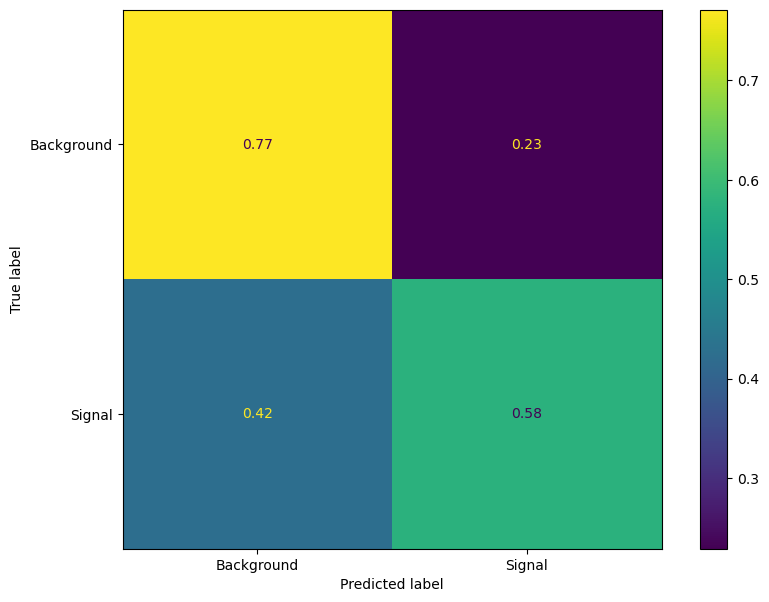

In [21]:
cm_binary = confusion_matrix(y_test_binary.values, y_preds_binary, normalize='true')
tick_labs_binary = ['Background', 'Signal']#'Model A', 'Model B', 'Model C', 'Model D']
cm_binary_display = ConfusionMatrixDisplay(confusion_matrix = cm_binary, display_labels = tick_labs_binary)
fig, ax = plt.subplots(figsize=(10, 7))
cm_binary_display.plot(ax=ax)
plt.show()

In [18]:
probas_bin = model.predict_proba(x_test_binary)
probas_bin

array([[9.68727869e-01, 3.12721306e-02],
       [2.57084985e-01, 7.42915015e-01],
       [2.86762873e-01, 7.13237127e-01],
       ...,
       [3.12297471e-02, 9.68770253e-01],
       [9.87018687e-01, 1.29813130e-02],
       [4.50543119e-06, 9.99995495e-01]])

In [19]:
probas_bin = np.array(probas_bin)
np.save('nbc_bin_probas.npy', probas_bin)

## Multi-class Gaussian

In [22]:
bkg = 0.
a = 0.
b = 0.
c = 0.
d = 0.
for i in y_train:
    if i == 0:
        bkg+=1
    elif i == 1:
        a+=1
    elif i == 2:
        b+=1
    elif i == 3:
        c+=1
    elif i == 4:
        d+=1

In [23]:
priors = np.array([bkg, a, b, c, d])/len(y_train)

In [24]:
priors

array([0.50013875, 0.12516301, 0.12485286, 0.12484803, 0.12499736])

### We expect the above priors to be 50:12.5:12.5:12.5:12.5 so this is good!

In [25]:
model = GaussianNB(priors=priors)

In [26]:
model.fit(x_train, y_train)

GaussianNB(priors=array([0.50013875, 0.12516301, 0.12485286, 0.12484803, 0.12499736]))

In [27]:
y_preds = model.predict(x_test)
precision = precision_score(y_test, y_preds, average='weighted')
recall = recall_score(y_test, y_preds, average='weighted')
f1 = f1_score(y_test, y_preds, average='weighted')
accuracy = accuracy_score(y_test, y_preds)
print('Precision: %.3f\nRecall: %.3f\nF1: %.3f\nAccuracy: %.3f'%(precision, recall, f1, accuracy))

Precision: 0.423
Recall: 0.519
F1: 0.452
Accuracy: 0.519


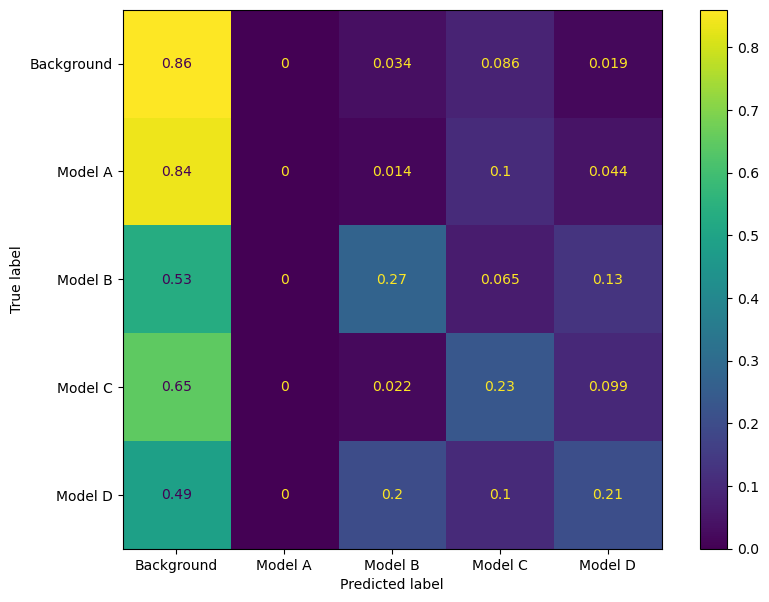

In [28]:
cm = confusion_matrix(y_test.values, y_preds, normalize='true')
tick_labs = ['Background', 'Model A', 'Model B', 'Model C', 'Model D']
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = tick_labs)
fig, ax = plt.subplots(figsize=(10, 7))
cm_display.plot(ax=ax)
plt.show()

In [29]:
pkl.dump(model, open('gaussian_bayes_red_noungr.pkl', 'wb'))

In [26]:
probas = model.predict_proba(x_test)
probas = np.array(probas)
np.save('nbc_multi_probas.npy', probas)

# Optimizing

## We actually should look at the model type. Gaussian NB might not be as good here with the values not following Gaussian distributions

In [34]:
model = MultinomialNB(class_prior=priors)

In [35]:
model.fit(x_train, y_train)

MultinomialNB(class_prior=array([0.50013875, 0.12516301, 0.12485286, 0.12484803, 0.12499736]))

In [36]:
y_preds = model.predict(x_test)
precision = precision_score(y_test, y_preds, average='weighted')
recall = recall_score(y_test, y_preds, average='weighted')
f1 = f1_score(y_test, y_preds, average='weighted')
accuracy = accuracy_score(y_test, y_preds)
print('Precision: %.3f\nRecall: %.3f\nF1: %.3f\nAccuracy: %.3f'%(precision, recall, f1, accuracy))

Precision: 0.249
Recall: 0.499
F1: 0.333
Accuracy: 0.499


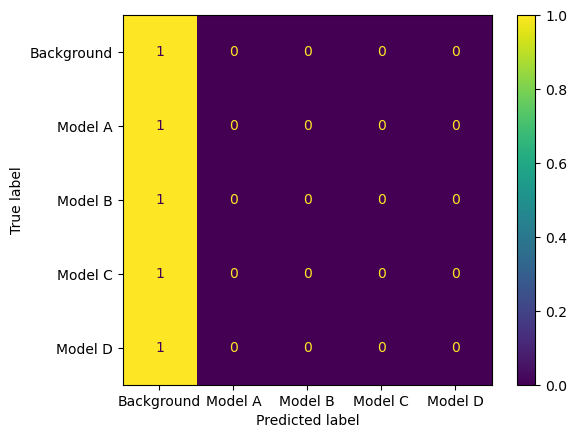

In [37]:
cm = confusion_matrix(y_test.values, y_preds, normalize='true')
tick_labs = ['Background', 'Model A', 'Model B', 'Model C', 'Model D']
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = tick_labs)

cm_display.plot()
plt.show()

## Multinomial distribution clearly not a good option either

## We could try complementary NB as well, which looks to improve on MultinomialNB

In [38]:
model = ComplementNB(class_prior=priors)

In [39]:
model.fit(x_train, y_train)

ComplementNB(class_prior=array([0.50013875, 0.12516301, 0.12485286, 0.12484803, 0.12499736]))

In [40]:
y_preds = model.predict(x_test)
precision = precision_score(y_test, y_preds, average='weighted')
recall = recall_score(y_test, y_preds, average='weighted')
f1 = f1_score(y_test, y_preds, average='weighted')
accuracy = accuracy_score(y_test, y_preds)
print('Precision: %.3f\nRecall: %.3f\nF1: %.3f\nAccuracy: %.3f'%(precision, recall, f1, accuracy))

Precision: 0.576
Recall: 0.551
F1: 0.491
Accuracy: 0.551


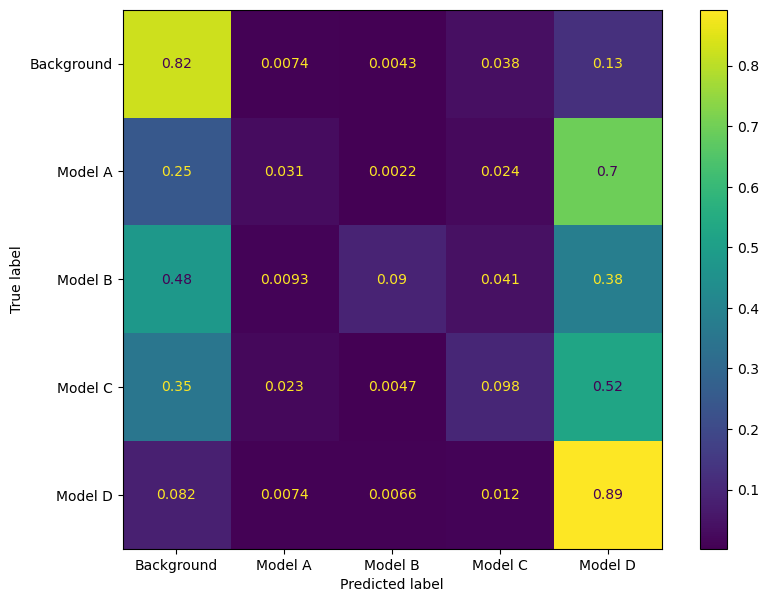

In [41]:
cm = confusion_matrix(y_test.values, y_preds, normalize='true')
tick_labs = ['Background', 'Model A', 'Model B', 'Model C', 'Model D']
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = tick_labs)
fig, ax = plt.subplots(figsize=(10, 7))
cm_display.plot(ax=ax)
plt.show()

## Should stick to GaussianNB as our variables resemble modified gaussians anyway

In [42]:
import scipy.stats as ss
from scipy.signal import convolve

In [43]:
df_test = pd.DataFrame(x_train)

In [44]:
df_test

,0,1,2,3,4,5,6
0,0.191117,0.207335,0.093789,0.296254,0.501954,0.088757,0.093834
1,0.127916,0.034369,0.059096,0.342813,0.304634,0.094675,0.112601
2,0.292803,0.504695,0.009761,0.329049,0.851810,0.068047,0.120643
3,0.124242,0.249045,0.116783,0.523692,0.274172,0.085799,0.056300
4,0.159560,0.466859,0.020315,0.386041,0.858609,0.162722,0.158177
...,...,...,...,...,...,...,...
1654062,0.125329,0.180601,0.022760,0.406006,0.587313,0.201183,0.101877
1654063,0.361818,0.139543,0.097603,0.584548,0.722575,0.153846,0.126005
1654064,0.188553,0.274564,0.005921,0.482293,0.195109,0.076923,0.072386
1654065,0.240279,0.446390,0.018314,0.027217,0.468552,0.038462,0.067024


In [45]:
fit_alpha, fit_loc, fit_beta = ss.gamma.fit(df_test[0])

In [46]:
print(fit_alpha, fit_loc, fit_beta)

6.583060093884115 -6.559044254612536e-06 0.031749723020052814


In [47]:
loglh = ss.gamma.logpdf(df_test[0], fit_alpha, fit_loc, fit_beta)

In [48]:
print(len(loglh), '\n', loglh)

1654067 
 [1.63992154 1.38895611 0.8189347  ... 1.64527181 1.36950573 1.2416208 ]


In [49]:
np.mean(loglh)

1.1412303912855382

## Use this likelihood (gamma pdf) to then make your own naive bayes model to test against the gaussian 

In [50]:
class GammaNB:
    #First get some basic info about the class vars
    def fit(self, x, y):
        #Get number of samples and features
        self.n_samples, self.n_features = x.shape
        #Get number of classes
        self.n_classes = len(np.unique(y))
        
        #Create 3 zero-matrices to store the summary stats and priors
        self.alpha = np.zeros((self.n_classes, self.n_features))
        self.loc = np.zeros((self.n_classes, self.n_features))
        self.beta = np.zeros((self.n_classes, self.n_features))
        #self.mean = np.zeros((self.n_classes, self.n_features))
        #self.variance = np.zeros((self.n_classes, self.n_features))
        self.priors = np.zeros(self.n_classes)
        
        for c in range(self.n_classes):
            # create a subset of data for the specific class 'c'
            x_c = x[y == c]
            temp = pd.DataFrame(x_c)
            a = np.array([])
            l = np.array([])
            b = np.array([])
            for i in temp.columns:
                a_, l_, b_ = ss.gamma.fit(temp[i].values)
                a = np.append(a, a_)
                l = np.append(l, l_)
                b = np.append(b, b_)
            # calculate statistics and update zero-matrices, rows=classes, cols=features
            #self.alpha[c, :], self.loc[c, :], self.beta[c, :] = ss.gamma.fit(x_c)
            self.alpha[c, :] = a
            self.loc[c, :] = l
            self.beta[c, :] = b
            #self.mean[c, :] = np.mean(x_c, axis = 0)
            #self.variance[c, :] = np.var(x_c, axis = 0)
            self.priors[c] = x_c.shape[0] / self.n_samples
    
    def gamma_density(self, x, alpha, loc, beta):
        return ss.gamma.pdf(x, alpha, loc, beta)
    
    def get_class_prob(self, x):
        # store new posteriors for each class in a single list
        posteriors = list()

        for c in range(self.n_classes):
            # get summary stats & prior
            alpha = self.alpha[c]
            loc = self.loc[c]
            beta = self.beta[c]
            prior = np.log(self.priors[c])
            
            # calculate new posterior & append to list
            posterior = np.sum(np.log(self.gamma_density(x, alpha, loc, beta)))
            posterior = prior + posterior
            posteriors.append(posterior)
        
        # return the index with the highest class probability
        return np.argmax(posteriors)
    
    def predict(self, X):
        # for each sample x in the dataset X
        y_hat = [self.get_class_prob(x) for x in X]
        return np.array(y_hat)

In [51]:
model = GammaNB()
model.fit(x_train, y_train.values)

In [52]:
y_preds = model.predict(x_test)
precision = precision_score(y_test, y_preds, average='weighted')
recall = recall_score(y_test, y_preds, average='weighted')
f1 = f1_score(y_test, y_preds, average='weighted')
accuracy = accuracy_score(y_test, y_preds)
print('Precision: %.3f\nRecall: %.3f\nF1: %.3f\nAccuracy: %.3f'%(precision, recall, f1, accuracy))

Precision: 0.648
Recall: 0.666
F1: 0.633
Accuracy: 0.666


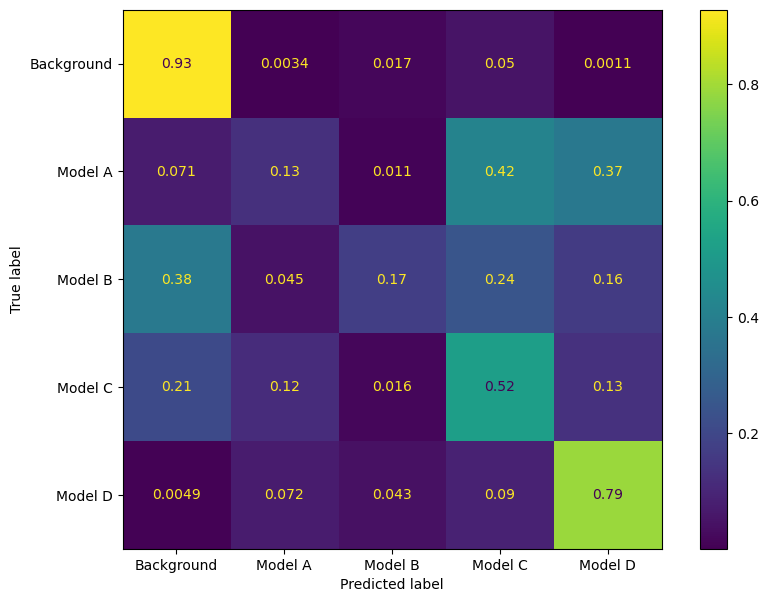

In [53]:
cm = confusion_matrix(y_test.values, y_preds, normalize='true')
tick_labs = ['Background', 'Model A', 'Model B', 'Model C', 'Model D']
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = tick_labs)
fig, ax = plt.subplots(figsize=(10, 7))
cm_display.plot(ax=ax)
plt.show()

## Gaussian is better, but we can try a convolution

In [54]:
class GammaGaussNB:
    #First get some basic info about the class vars
    def fit(self, x, y):
        #Get number of samples and features
        self.n_samples, self.n_features = x.shape
        #Get number of classes
        self.n_classes = len(np.unique(y))
        
        #Create 3 zero-matrices to store the summary stats and priors
        self.alpha = np.zeros((self.n_classes, self.n_features))
        self.loc = np.zeros((self.n_classes, self.n_features))
        self.beta = np.zeros((self.n_classes, self.n_features))
        self.mean = np.zeros((self.n_classes, self.n_features))
        self.variance = np.zeros((self.n_classes, self.n_features))
        self.priors = np.zeros(self.n_classes)
        
        for c in range(self.n_classes):
            # create a subset of data for the specific class 'c'
            x_c = x[y == c]
            temp = pd.DataFrame(x_c)
            a = np.array([])
            l = np.array([])
            b = np.array([])
            for i in temp.columns:
                a_, l_, b_ = ss.gamma.fit(temp[i].values)
                a = np.append(a, a_)
                l = np.append(l, l_)
                b = np.append(b, b_)
            # calculate statistics and update zero-matrices, rows=classes, cols=features
            self.alpha[c, :] = a
            self.loc[c, :] = l
            self.beta[c, :] = b
            self.mean[c, :] = np.mean(x_c, axis = 0)
            self.variance[c, :] = np.var(x_c, axis = 0)
            self.priors[c] = x_c.shape[0] / self.n_samples
    
    def gamma_density(self, x, alpha, loc, beta):
        return ss.gamma.pdf(x, alpha, loc, beta)
    
    def gaussian_density(self, x, mean, var):
        const = 1 / np.sqrt(var*2*np.pi)
        proba = np.exp(-0.5*((x-mean)**2 /var))
        return const*proba
    
    def convolved_density(self, x, alpha, loc, beta, mean, var):
        gam = self.gamma_density(x, alpha, loc, beta)
        gauss = self.gaussian_density(x, mean, var)
        return convolve(gam, gauss)
    
    def get_class_prob(self, x):
        # store new posteriors for each class in a single list
        posteriors = list()

        for c in range(self.n_classes):
            # get summary stats & prior
            alpha = self.alpha[c]
            loc = self.loc[c]
            beta = self.beta[c]
            mean = self.mean[c]
            var = self.variance[c]
            prior = np.log(self.priors[c])
            
            # calculate new posterior & append to list
            posterior = np.sum(np.log(self.convolved_density(x, alpha, loc, beta, mean, var)))
            posterior = prior + posterior
            posteriors.append(posterior)
        
        # return the index with the highest class probability
        return np.argmax(posteriors)
    
    def predict(self, X):
        # for each sample x in the dataset X
        y_hat = [self.get_class_prob(x) for x in X]
        return np.array(y_hat)

In [55]:
model = GammaGaussNB()

In [56]:
model.fit(x_train, y_train.values)

In [57]:
y_preds = model.predict(x_test)
precision = precision_score(y_test, y_preds, average='weighted')
recall = recall_score(y_test, y_preds, average='weighted')
f1 = f1_score(y_test, y_preds, average='weighted')
accuracy = accuracy_score(y_test, y_preds)
print('Precision: %.3f\nRecall: %.3f\nF1: %.3f\nAccuracy: %.3f'%(precision, recall, f1, accuracy))

Precision: 0.675
Recall: 0.663
F1: 0.668
Accuracy: 0.663


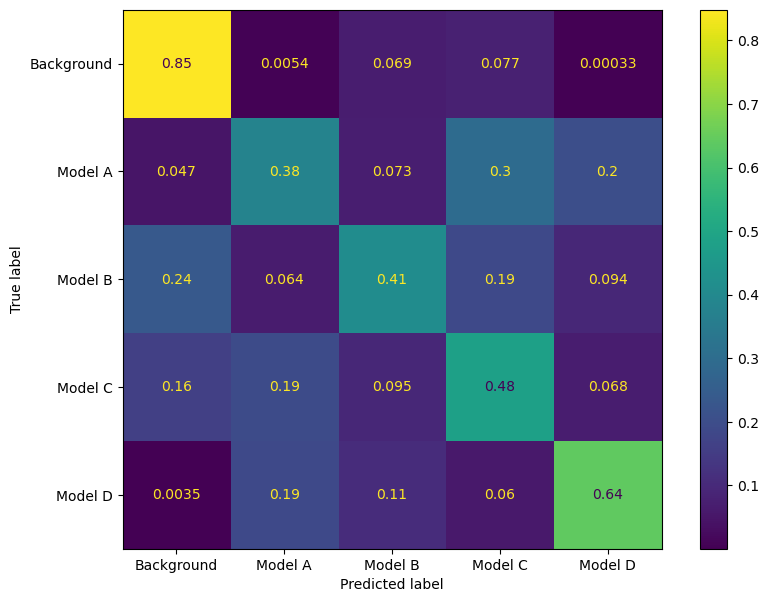

In [58]:
cm = confusion_matrix(y_test.values, y_preds, normalize='true')
tick_labs = ['Background', 'Model A', 'Model B', 'Model C', 'Model D']
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = tick_labs)
fig, ax = plt.subplots(figsize=(10, 7))
cm_display.plot(ax=ax)
plt.show()

In [59]:
pkl.dump(model, open('gamma_gauss_bayes_red.pkl', 'wb'))

In [21]:
nbc = pkl.load(open('gaussian_bayes_red.pkl', 'rb'))
nbc_bin = pkl.load(open('gauss_bayes_bin_red.pkl', 'rb'))

In [27]:
red_test_df = pd.read_csv('red_test_df.csv').drop(columns='Unnamed: 0')

In [28]:
x_ass = red_test_df.iloc[:, :-2]
labels = red_test_df.labels
bin_labels = red_test_df.binary_labels

In [30]:
y_preds = nbc.predict(x_ass)
precision = precision_score(labels, y_preds, average='weighted')
recall = recall_score(labels, y_preds, average='weighted')
f1 = f1_score(labels, y_preds, average='weighted')
accuracy = accuracy_score(labels, y_preds)
print('Precision: %.3f\nRecall: %.3f\nF1: %.3f\nAccuracy: %.3f'%(precision, recall, f1, accuracy))

Precision: 0.997
Recall: 0.881
F1: 0.935
Accuracy: 0.881


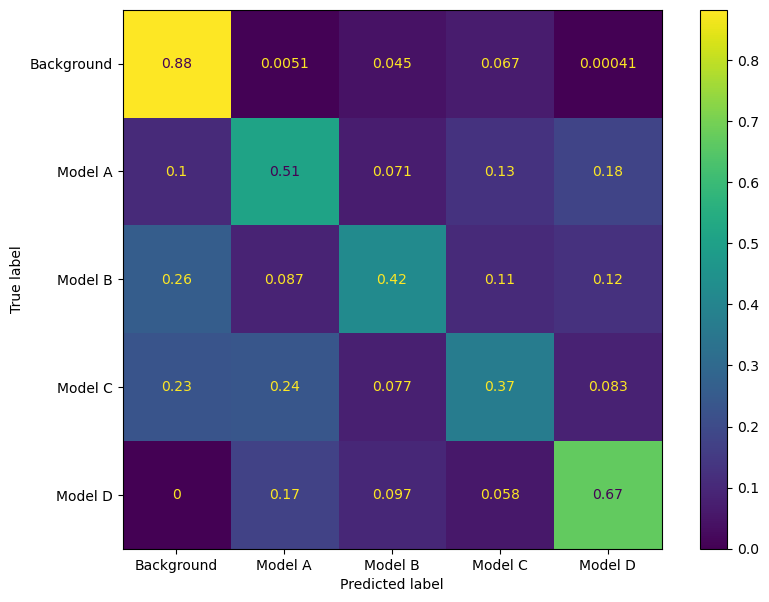

In [31]:
cm = confusion_matrix(labels, y_preds, normalize='true')
tick_labs = ['Background', 'Model A', 'Model B', 'Model C', 'Model D']
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = tick_labs)
fig, ax = plt.subplots(figsize=(10,7))
cm_display.plot(ax=ax)
plt.show()

In [32]:
y_preds = nbc_bin.predict(x_ass)
precision = precision_score(bin_labels, y_preds, average='weighted')
recall = recall_score(bin_labels, y_preds, average='weighted')
f1 = f1_score(bin_labels, y_preds, average='weighted')
accuracy = accuracy_score(bin_labels, y_preds)
print('Precision: %.3f\nRecall: %.3f\nF1: %.3f\nAccuracy: %.3f'%(precision, recall, f1, accuracy))

Precision: 0.997
Recall: 0.892
F1: 0.941
Accuracy: 0.892


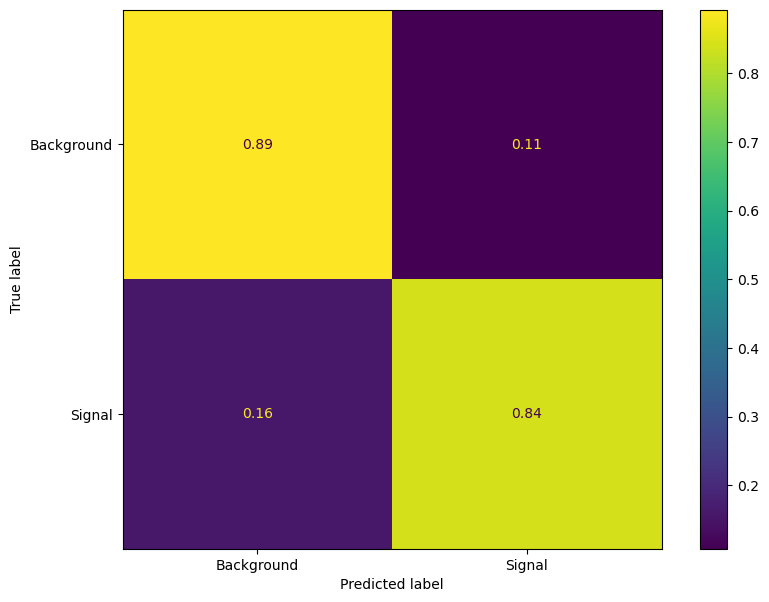

In [33]:
cm = confusion_matrix(bin_labels, y_preds, normalize='true')
tick_labs = ['Background', 'Signal']
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = tick_labs)
fig, ax = plt.subplots(figsize=(10,7))
cm_display.plot(ax=ax)
plt.show()

In [7]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import roc_curve, auc

In [8]:
nbc = pkl.load(open('gaussian_bayes_red.pkl', 'rb'))
nbc_bin = pkl.load(open('gaussian_bayes_bin_red.pkl', 'rb'))

In [9]:
df = pd.read_csv('df_bkg_red.csv').drop(columns = 'Unnamed: 0')
models = ['A', 'B', 'C', 'D']
for i in models:
    df = pd.concat([df, pd.read_csv('df_model%s_red.csv'%(i)).drop(columns = 'Unnamed: 0')], ignore_index=True) 

In [10]:
labels_bin = df.labels.replace([2, 3, 4], 1)

In [11]:
features = df.iloc[:, :7]
labels = df.labels

In [12]:
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
_, _, y_train_bin, y_test_bin = train_test_split(features, labels_bin, test_size=0.2, random_state=42)

In [13]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [14]:
proba_trees = nbc_bin.predict_proba(x_test)

In [15]:
scaled = MinMaxScaler().fit_transform(proba_trees)[:, 1]

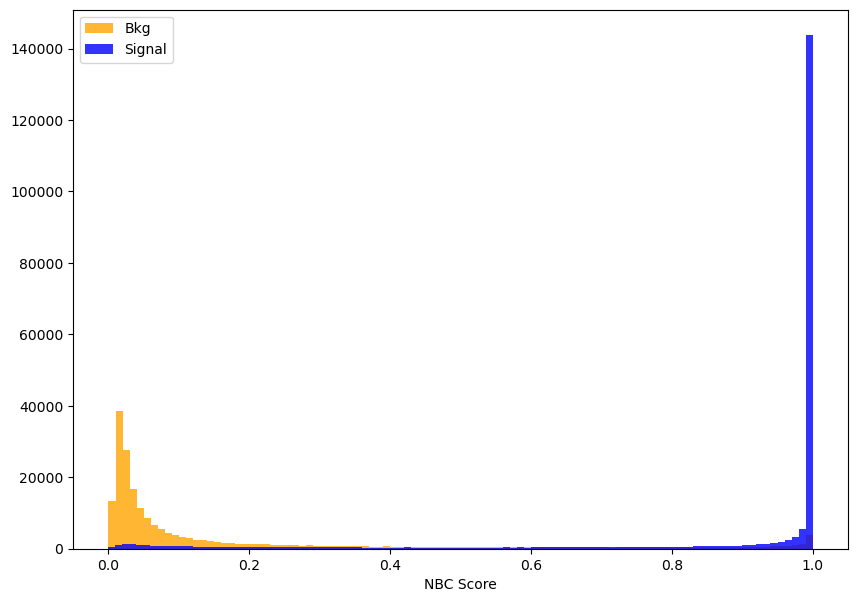

In [16]:
plt.figure(figsize=(10, 7))
plt.hist(x=scaled[y_test_bin==0], color='orange', label = 'Bkg', bins=100, alpha = 0.8)
plt.hist(x=scaled[y_test_bin==1], color='blue', label = 'Signal', bins=100, alpha = 0.8)
plt.xlabel('NBC Score')
plt.legend()
plt.savefig('plots/fixed_scores/nbc_bin_scores.png')
plt.show()

classes = [1, 2, 3, 4]
models = ['bkg','A', 'B', 'C', 'D']
for i in classes:
    new = classes.copy()
    new.remove(i)
    print(new)
    #y_test_new = y_test.replace(to_replace=new, value=0)
    #y_test_new = y_test_new.replace(i, 1)
    y_train_new = y_train.replace(to_replace = new, value = 0)
    y_train_new = y_train_new.replace(i, 1)
    nbc_bin.fit(x_train, y_train_new)
    probs = nbc_bin.predict_proba(x_test)
    preds = probs[:, 1]
    print(preds)
    scaled = MinMaxScaler().fit_transform(probs)
    plt.figure(figsize=(10,7))
    sns.histplot(x=scaled[:,0], color='orange', label = 'Model %s'%models[i])
    sns.histplot(x=scaled[:,1], color='cyan', label = 'Bkg and Others')
    plt.xlabel('NBC Score')
    plt.legend()
    plt.show()

1


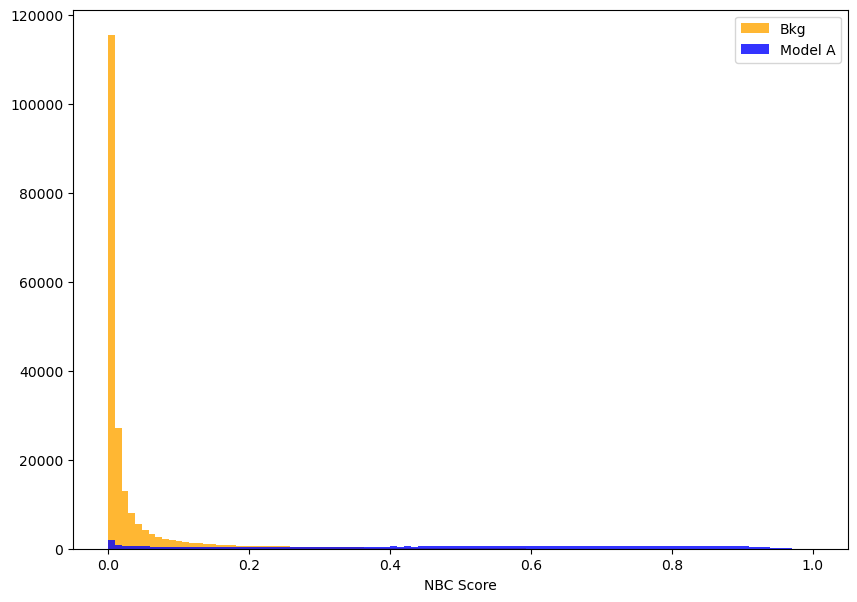

2


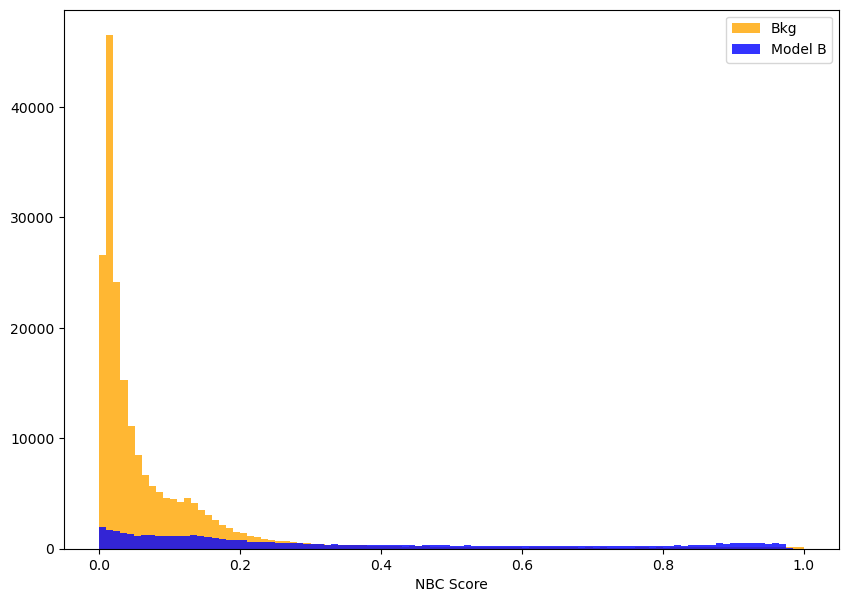

3


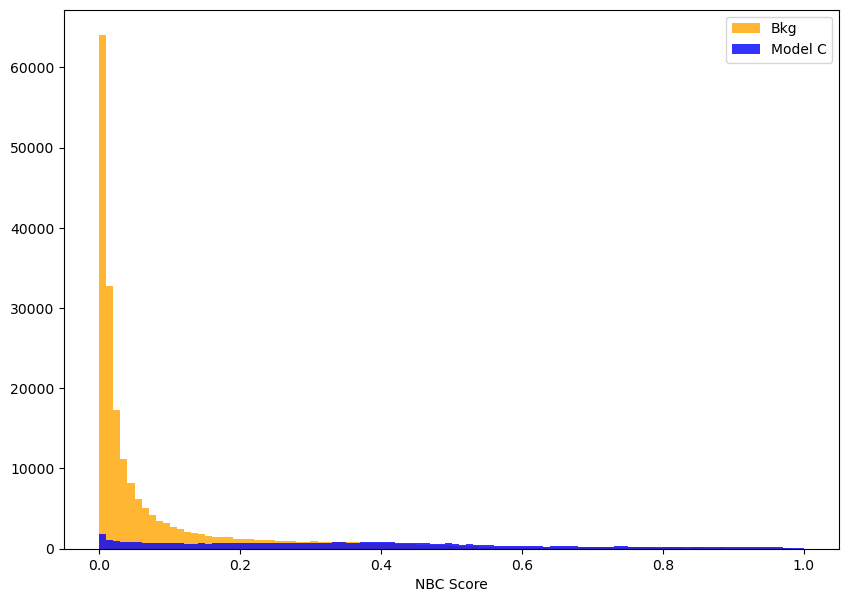

4


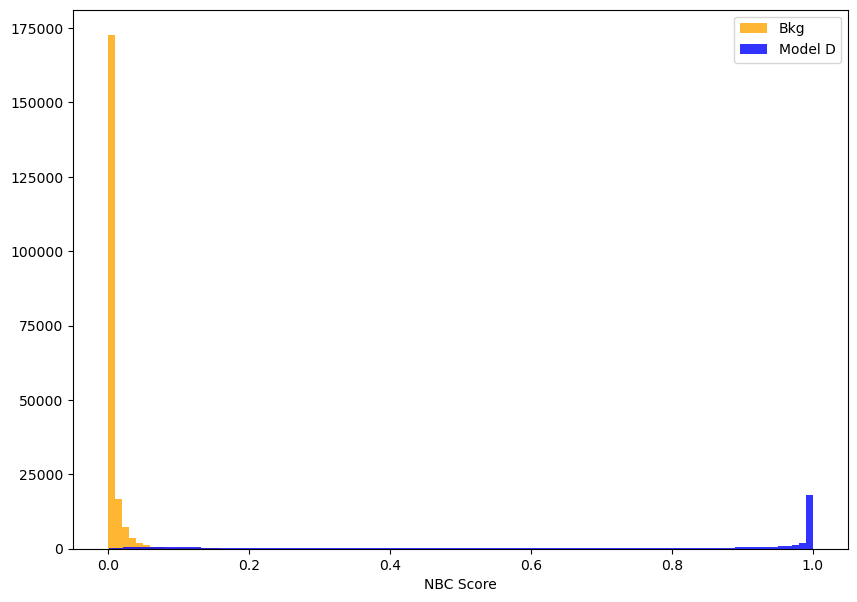

In [17]:
classes = [1, 2, 3, 4]
models = ['bkg','A', 'B', 'C', 'D']
for i in classes:
    print(i)
    probs = nbc.predict_proba(x_test)
    scaled = MinMaxScaler().fit_transform(probs)[:, i]
    plt.figure(figsize=(10,7))
    plt.hist(x=scaled[y_test==0], color='orange', label = 'Bkg', alpha = 0.8, bins = 100)
    plt.hist(x=scaled[y_test==i], color='blue', label = 'Model %s'%models[i], alpha = 0.8, bins = 100)
    plt.xlabel('NBC Score')
    plt.legend()
    plt.savefig('plots/fixed_scores/nbc_bkg_vs_model%s_scores.png'%models[i])
    plt.show()

# ROC Curves

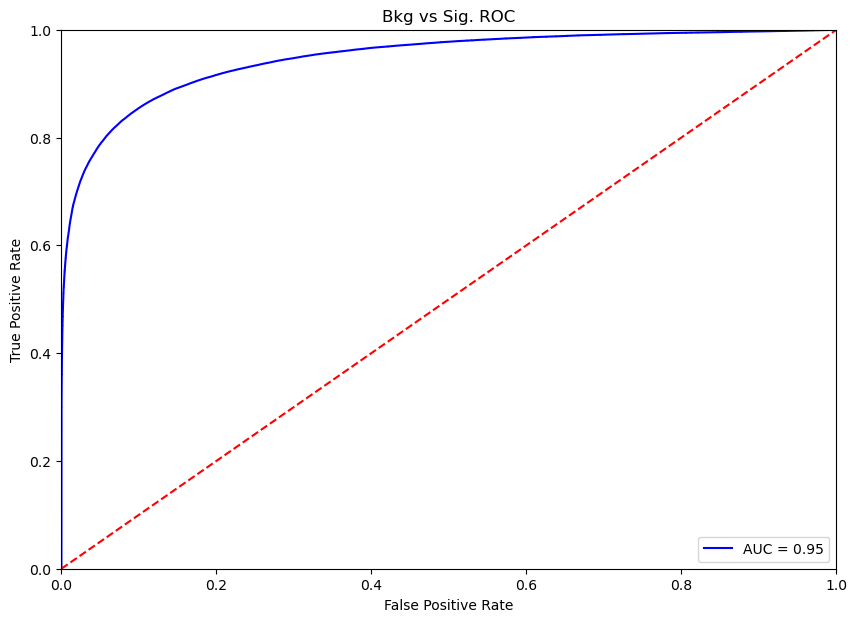

In [18]:
probs = nbc_bin.predict_proba(x_test)
preds = probs[:, 1]
fpr, tpr, threshold = roc_curve(y_test_bin, preds)
roc_auc = auc(fpr, tpr)

# method I: plt
plt.figure(figsize=(10,7))
plt.title('Bkg vs Sig. ROC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig('plots/fixed_rocs/nbc_bin_roc.png')
plt.show()

In [14]:
opt_thresh_bin = threshold[np.argmax(tpr-fpr)]
opt_thresh_bin

0.6539954621709063

df_1vr = df.copy()
classes = [1, 2, 3, 4]
fpr_tpr_auc = {}
for i in classes:
    new = classes.copy()
    new.remove(i)
    print(new)
    y_test_new = y_test.replace(to_replace=new, value=0)
    y_test_new = y_test_new.replace(i, 1)
    probs = nbc.predict_proba(x_test)
    preds = probs[:, 1]
    fp, tp, thresh = roc_curve(y_test_new, preds)
    roc_auc = auc(fp, tp)
    fpr_tpr_auc[i] = {}
    fpr_tpr_auc[i]['fpr'] = fp
    fpr_tpr_auc[i]['tpr'] = tp
    fpr_tpr_auc[i]['roc_auc'] = roc_auc
    fpr_tpr_auc[i]['threshold'] = thresh

In [19]:
classes = [1, 2, 3, 4]
fpr_tpr_auc = {}
for i in classes:
    probs = nbc.predict_proba(x_test)
    preds = probs[:, i]
    fp, tp, thresh = roc_curve(y_test, preds, pos_label=i)
    roc_auc = auc(fp, tp)
    fpr_tpr_auc[i] = {}
    fpr_tpr_auc[i]['fpr'] = fp
    fpr_tpr_auc[i]['tpr'] = tp
    fpr_tpr_auc[i]['roc_auc'] = roc_auc
    fpr_tpr_auc[i]['threshold'] = thresh

Model A optimum classification threshold: 0.110
Model B optimum classification threshold: 0.130
Model C optimum classification threshold: 0.120
Model D optimum classification threshold: 0.101


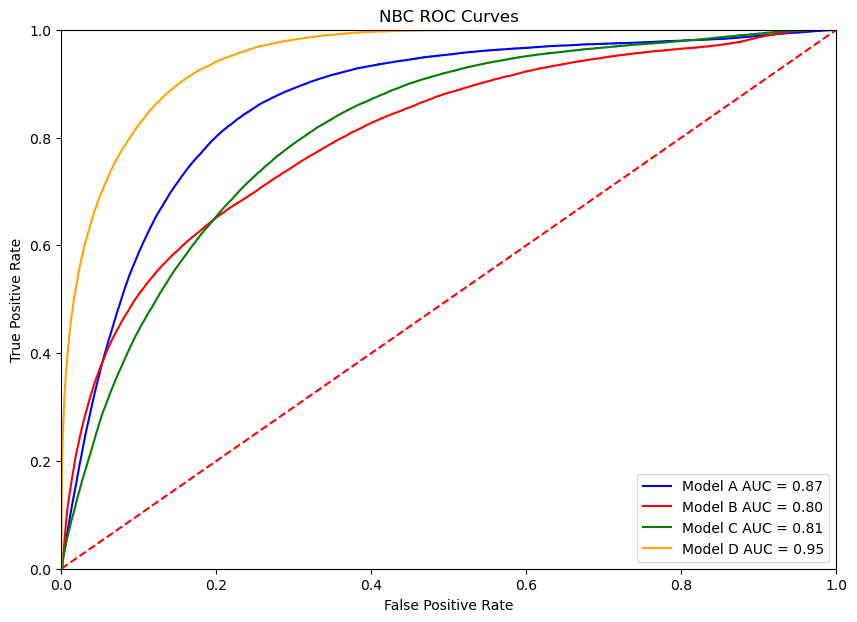

In [20]:
models = ['Bkg', 'A', 'B', 'C', 'D']
colours = ['None', 'b', 'r', 'g', 'orange']
plt.figure(figsize=(10,7))
plt.title('NBC ROC Curves')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
for i in fpr_tpr_auc.keys():
    plt.plot(fpr_tpr_auc[i]['fpr'], fpr_tpr_auc[i]['tpr'], 
             colours[i], label = 'Model %s AUC = %0.2f' %(models[i], fpr_tpr_auc[i]['roc_auc']))
    opt_thresh = fpr_tpr_auc[i]['threshold'][np.argmax(fpr_tpr_auc[i]['tpr']-fpr_tpr_auc[i]['fpr'])]
    print('Model %s optimum classification threshold: %0.3f'%(models[i], opt_thresh))
plt.legend(loc = 'lower right')
plt.savefig('plots/fixed_rocs/nbc_roc.png')
plt.show()